In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [89]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

train.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN


In [90]:
# 지역으로 'id',
train_A = train[['X01','X02','X04','X05','X11','X12','X13','X00']]
train_B = train[['X06','X03','X10','X08','X14','X20','X15','X07']]
train_C = train[['X22','X18','X21','X09','X16','X30','X17','X28']]
train_D = train[['X27','X24','X36','X23','X19','X37','X25','X31']]
train_E = train[['X29','X26','X39','X33','X34','X38','X35','X32']]

train_A 

,X01,X02,X04,X05,X11,X12,X13,X00
0,988.8,1.2,0.0,1009.3,0.00,82.4,71.3,9.7
1,988.9,1.7,0.0,1009.3,0.00,81.2,121.8,9.3
2,989.0,1.1,0.0,1009.2,0.00,86.1,232.0,9.4
3,988.9,1.5,0.0,1009.2,0.00,87.7,0.0,9.4
4,988.9,0.8,0.0,1009.2,0.00,88.9,0.0,9.2
...,...,...,...,...,...,...,...,...
4747,987.6,0.9,0.0,1006.9,23.88,95.3,333.1,19.9
4748,987.6,0.5,0.0,1006.8,23.88,95.6,216.4,19.9
4749,987.7,0.9,0.0,1006.9,23.88,95.9,127.8,19.7
4750,987.7,0.9,0.0,1006.9,23.88,95.9,323.8,19.4


In [91]:
test_A = test[['X01','X02','X04','X05','X11','X12','X13','X00']]
test_B = test[['X06','X03','X10','X08','X14','X20','X15','X07']]
test_C = test[['X22','X18','X21','X09','X16','X30','X17','X28']]
test_D = test[['X27','X24','X36','X23','X19','X37','X25','X31']]
test_E = test[['X29','X26','X39','X33','X34','X38','X35','X32']]

In [92]:
train_A = train_A.rename(columns={
    'X01':'AirPressure'
    ,'X02':'WindSpeed'
    ,'X04':'Precipitation'
    ,'X05':'SeaPressure'
    ,'X11':'Insolation'
    ,'X12':'Humidity'
    ,'X13':'WindDirection'
    ,'X00':'target'})

train_B = train_A.rename(columns={
    'X06':'AirPressure'
    ,'X03':'WindSpeed'
    ,'X10':'Precipitation'
    ,'X08':'SeaPressure'
    ,'X14':'Insolation'
    ,'X20':'Humidity'
    ,'X15':'WindDirection'
    ,'X07':'target'})

train_C = train_A.rename(columns={
    'X22':'AirPressure'
    ,'X18':'WindSpeed'
    ,'X21':'Precipitation'
    ,'X09':'SeaPressure'
    ,'X16':'Insolation'
    ,'X30':'Humidity'
    ,'X17':'WindDirection'
    ,'X28':'target'})

train_D = train_A.rename(columns={
    'X27':'AirPressure'
    ,'X24':'WindSpeed'
    ,'X36':'Precipitation'
    ,'X23':'SeaPressure'
    ,'X19':'Insolation'
    ,'X37':'Humidity'
    ,'X25':'WindDirection'
    ,'X31':'target'})

train_E = train_A.rename(columns={
    'X29':'AirPressure'
    ,'X26':'WindSpeed'
    ,'X39':'Precipitation'
    ,'X33':'SeaPressure'
    ,'X34':'Insolation'
    ,'X38':'Humidity'
    ,'X35':'WindDirection'
    ,'X32':'target'})

train_A

,AirPressure,WindSpeed,Precipitation,SeaPressure,Insolation,Humidity,WindDirection,target
0,988.8,1.2,0.0,1009.3,0.00,82.4,71.3,9.7
1,988.9,1.7,0.0,1009.3,0.00,81.2,121.8,9.3
2,989.0,1.1,0.0,1009.2,0.00,86.1,232.0,9.4
3,988.9,1.5,0.0,1009.2,0.00,87.7,0.0,9.4
4,988.9,0.8,0.0,1009.2,0.00,88.9,0.0,9.2
...,...,...,...,...,...,...,...,...
4747,987.6,0.9,0.0,1006.9,23.88,95.3,333.1,19.9
4748,987.6,0.5,0.0,1006.8,23.88,95.6,216.4,19.9
4749,987.7,0.9,0.0,1006.9,23.88,95.9,127.8,19.7
4750,987.7,0.9,0.0,1006.9,23.88,95.9,323.8,19.4


In [93]:
test_A = test_A.rename(columns={
    'X01':'AirPressure'
    ,'X02':'WindSpeed'
    ,'X04':'Precipitation'
    ,'X05':'SeaPressure'
    ,'X11':'Insolation'
    ,'X12':'Humidity'
    ,'X13':'WindDirection'
    ,'X00':'target'})

test_B = test_A.rename(columns={
    'X06':'AirPressure'
    ,'X03':'WindSpeed'
    ,'X10':'Precipitation'
    ,'X08':'SeaPressure'
    ,'X14':'Insolation'
    ,'X20':'Humidity'
    ,'X15':'WindDirection'
    ,'X07':'target'})

test_C = test_A.rename(columns={
    'X22':'AirPressure'
    ,'X18':'WindSpeed'
    ,'X21':'Precipitation'
    ,'X09':'SeaPressure'
    ,'X16':'Insolation'
    ,'X30':'Humidity'
    ,'X17':'WindDirection'
    ,'X28':'target'})

test_D = test_A.rename(columns={
    'X27':'AirPressure'
    ,'X24':'WindSpeed'
    ,'X36':'Precipitation'
    ,'X23':'SeaPressure'
    ,'X19':'Insolation'
    ,'X37':'Humidity'
    ,'X25':'WindDirection'
    ,'X31':'target'})

test_E = test_A.rename(columns={
    'X29':'AirPressure'
    ,'X26':'WindSpeed'
    ,'X39':'Precipitation'
    ,'X33':'SeaPressure'
    ,'X34':'Insolation'
    ,'X38':'Humidity'
    ,'X35':'WindDirection'
    ,'X32':'target'})

test_A

,AirPressure,WindSpeed,Precipitation,SeaPressure,Insolation,Humidity,WindDirection,target
0,987.4,1.5,0.0,1006.8,0.0,96.1,333.6,18.7
1,987.4,1.1,0.0,1006.7,0.0,96.2,335.5,18.8
2,987.4,1.3,0.0,1006.6,0.0,96.4,0.0,19.0
3,987.4,2.3,0.0,1006.6,0.0,96.5,252.9,18.7
4,987.4,1.1,0.0,1006.7,0.0,96.6,238.2,18.4
...,...,...,...,...,...,...,...,...
11515,993.2,3.9,0.0,1011.7,17.1,88.1,65.6,25.7
11516,993.2,3.0,0.0,1011.7,17.1,75.5,51.9,25.6
11517,993.2,3.8,0.0,1011.9,17.1,77.5,29.0,25.6
11518,993.2,2.4,0.0,1011.8,17.1,74.1,30.0,25.5


In [94]:
train = pd.concat([train_A, train_B, train_C, train_D, train_E])
train

,AirPressure,WindSpeed,Precipitation,SeaPressure,Insolation,Humidity,WindDirection,target
0,988.8,1.2,0.0,1009.3,0.00,82.4,71.3,9.7
1,988.9,1.7,0.0,1009.3,0.00,81.2,121.8,9.3
2,989.0,1.1,0.0,1009.2,0.00,86.1,232.0,9.4
3,988.9,1.5,0.0,1009.2,0.00,87.7,0.0,9.4
4,988.9,0.8,0.0,1009.2,0.00,88.9,0.0,9.2
...,...,...,...,...,...,...,...,...
4747,987.6,0.9,0.0,1006.9,23.88,95.3,333.1,19.9
4748,987.6,0.5,0.0,1006.8,23.88,95.6,216.4,19.9
4749,987.7,0.9,0.0,1006.9,23.88,95.9,127.8,19.7
4750,987.7,0.9,0.0,1006.9,23.88,95.9,323.8,19.4


In [77]:
#test = pd.concat([test_A, test_B, test_C, test_D, test_E])
#test

,AirPressure,WindSpeed,Precipitation,SeaPressure,Insolation,Humidity,WindDirection,target
0,987.4,1.5,0.0,1006.8,0.0,96.1,333.6,18.7
1,987.4,1.1,0.0,1006.7,0.0,96.2,335.5,18.8
2,987.4,1.3,0.0,1006.6,0.0,96.4,0.0,19.0
3,987.4,2.3,0.0,1006.6,0.0,96.5,252.9,18.7
4,987.4,1.1,0.0,1006.7,0.0,96.6,238.2,18.4
...,...,...,...,...,...,...,...,...
11515,993.2,3.9,0.0,1011.7,17.1,88.1,65.6,25.7
11516,993.2,3.0,0.0,1011.7,17.1,75.5,51.9,25.6
11517,993.2,3.8,0.0,1011.9,17.1,77.5,29.0,25.6
11518,993.2,2.4,0.0,1011.8,17.1,74.1,30.0,25.5


In [59]:
print('[shape]\t',train.shape)
print('\n[info]\n')
train.info()

[shape]	 (23760, 8)

[info]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23760 entries, 0 to 4751
Data columns (total 8 columns):
AirPressure      23760 non-null float64
WindSpeed        23760 non-null float64
Precipitation    23760 non-null float64
SeaPressure      23760 non-null float64
Insolation       23760 non-null float64
Humidity         23760 non-null float64
WindDirection    23760 non-null float64
target           23760 non-null float64
dtypes: float64(8)
memory usage: 1.6 MB


In [60]:
print('\n전체 feature 들의 type \n',train.dtypes.value_counts())


전체 feature 들의 type 
 float64    8
dtype: int64


In [61]:
train.describe()

,AirPressure,WindSpeed,Precipitation,SeaPressure,Insolation,Humidity,WindDirection,target
count,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000
mean,988.621107,1.509764,1.270223,1008.333902,11.008479,68.209827,161.357639,20.227904
std,3.359633,1.071768,4.429479,3.394751,10.872624,22.276177,98.779143,4.707174
min,977.300000,0.000000,0.000000,997.200000,0.000000,16.400000,0.000000,8.300000
25%,986.800000,0.700000,0.000000,1006.500000,0.020000,49.500000,69.225000,16.900000
50%,988.600000,1.300000,0.000000,1008.500000,7.690000,72.150000,182.600000,19.900000
75%,991.000000,2.100000,0.000000,1010.800000,22.190000,89.025000,228.925000,24.100000
max,997.200000,10.200000,25.600000,1016.800000,30.700000,97.900000,360.000000,30.900000


,AirPressure,WindSpeed,Precipitation,SeaPressure,Insolation,Humidity,WindDirection,target
AirPressure,1.000000,-0.122451,-0.363102,0.995697,-0.089368,-0.042883,0.057005,-0.125318
WindSpeed,-0.122451,1.000000,0.025746,-0.131678,0.206416,-0.331855,-0.081778,0.187422
Precipitation,-0.363102,0.025746,1.000000,-0.353487,-0.154828,0.213551,-0.057953,-0.102449
SeaPressure,0.995697,-0.131678,-0.353487,1.000000,-0.118443,-0.016912,0.064472,-0.165298
Insolation,-0.089368,0.206416,-0.154828,-0.118443,1.000000,-0.615864,0.072050,0.528454
Humidity,-0.042883,-0.331855,0.213551,-0.016912,-0.615864,1.000000,-0.006889,-0.792650
WindDirection,0.057005,-0.081778,-0.057953,0.064472,0.072050,-0.006889,1.000000,0.003077
target,-0.125318,0.187422,-0.102449,-0.165298,0.528454,-0.792650,0.003077,1.000000


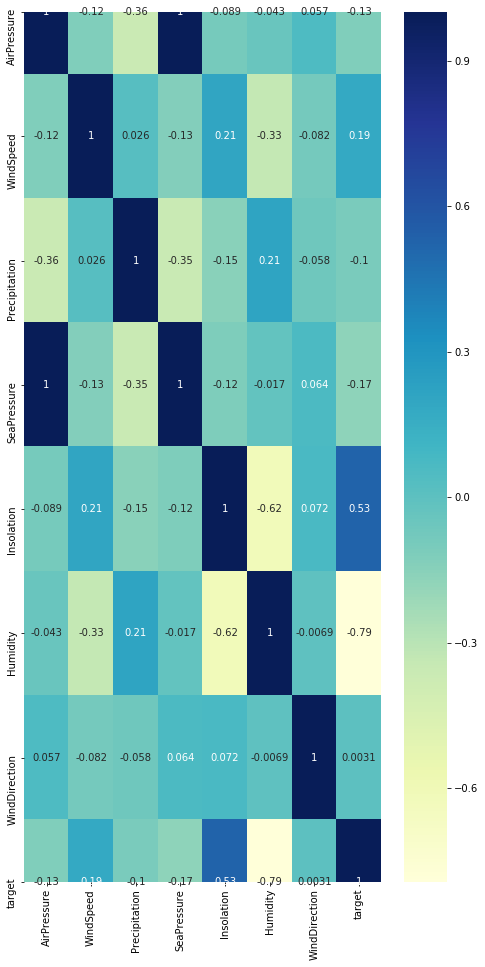

In [62]:
plt.figure(figsize=(8, 16))
corr = train.corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True)
corr

In [95]:
target = train['target']

In [96]:
train.drop(['AirPressure','WindSpeed','Precipitation','SeaPressure','WindDirection','target'], axis=1, inplace=True)

In [97]:
test_A.drop(['AirPressure','WindSpeed','Precipitation','SeaPressure','WindDirection','target'], axis=1, inplace=True)
test_B.drop(['AirPressure','WindSpeed','Precipitation','SeaPressure','WindDirection','target'], axis=1, inplace=True)
test_C.drop(['AirPressure','WindSpeed','Precipitation','SeaPressure','WindDirection','target'], axis=1, inplace=True)
test_D.drop(['AirPressure','WindSpeed','Precipitation','SeaPressure','WindDirection','target'], axis=1, inplace=True)
test_E.drop(['AirPressure','WindSpeed','Precipitation','SeaPressure','WindDirection','target'], axis=1, inplace=True)

In [65]:
train

,Insolation,Humidity
0,0.00,82.4
1,0.00,81.2
2,0.00,86.1
3,0.00,87.7
4,0.00,88.9
...,...,...
4747,23.88,95.3
4748,23.88,95.6
4749,23.88,95.9
4750,23.88,95.9


In [79]:
test

,Insolation,Humidity
0,0.0,96.1
1,0.0,96.2
2,0.0,96.4
3,0.0,96.5
4,0.0,96.6
...,...,...
11515,17.1,88.1
11516,17.1,75.5
11517,17.1,77.5
11518,17.1,74.1


In [98]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train , target ,test_size=0.3, shuffle=True, random_state=156)

In [99]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16632, 2) (7128, 2) (16632,) (7128,)


In [100]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [101]:
li_reg = LinearRegression(
    fit_intercept=True, # 절편값 계산, False: 절편 사용되지 않고 0 
    normalize=False, # fit_intercept=True 일때만 사용, 회귀 수행 전 정규화 수행
    copy_X=True,
    n_jobs=None,
)

lo_reg = LogisticRegression()

rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)

gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

In [116]:
li_reg.fit(X_train ,y_train)
lo_reg.fit(X_train ,y_train.astype('int'))
rf_reg.fit(X_train ,y_train)
gb_reg.fit(X_train ,y_train)
dt_reg.fit(X_train ,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [117]:
y_preds_li = li_reg.predict(X_test)
y_preds_lo = lo_reg.predict(X_test)
y_preds_rf = rf_reg.predict(X_test)
y_preds_gb = gb_reg.predict(X_test)
y_preds_dt = dt_reg.predict(X_test)
#y_preds = lo_reg.predict(X_test)
#y_preds = rf_reg.predict(X_test)

In [72]:
y_preds.shape

(7128,)

In [104]:
def mse_AIFrenz(y_true, y_pred):
    '''
    y_true: 실제 값
    y_pred: 예측 값
    '''
    diff = abs(y_true - y_pred)
    
    less_then_one = np.where(diff < 1, 0, diff)
    
    # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
    score = np.average(np.average(less_then_one ** 2, axis = 0))
    
    return score

In [119]:
print('\n',mse_AIFrenz(y_test, y_preds_li))
print('\n',mse_AIFrenz(y_test, y_preds_lo))
print('\n',mse_AIFrenz(y_test, y_preds_rf))
print('\n',mse_AIFrenz(y_test, y_preds_gb))
print('\n',mse_AIFrenz(y_test, y_preds_dt))


 8.217655066377178

 10.521830808080809

 1.7950369326544529

 3.245392172493544

 6.442166639729317


In [ ]:
prediction = li_reg.predict(X_test)

In [121]:
prediction_A = rf_reg.predict(test_A)
prediction_B = rf_reg.predict(test_B)
prediction_C = rf_reg.predict(test_C)
prediction_D = rf_reg.predict(test_D)
prediction_E = rf_reg.predict(test_E)

In [107]:
prediction_A.shape

(11520,)

In [122]:
predict = prediction_A+prediction_B+prediction_C+prediction_D+prediction_E
predict

array([71.62207625, 64.35376749, 69.21993702, ..., 94.7555    ,
       97.1565    , 96.9495    ])

In [123]:
predict = predict/5
predict

array([14.32441525, 12.8707535 , 13.8439874 , ..., 18.9511    ,
       19.4313    , 19.3899    ])

In [112]:
predict.shape

(11520,)

In [81]:
prediction_test

array([15.48102559, 15.4650762 , 15.43317743, ..., 18.9019499 ,
       19.44422897, 19.57182405])

In [82]:
submission

,id,Y18
0,4752,0
1,4753,0
2,4754,0
3,4755,0
4,4756,0
...,...,...
11515,16267,0
11516,16268,0
11517,16269,0
11518,16270,0


In [124]:
submission['Y18'] = predict

In [125]:
submission.to_csv('data/submission_0331_2.csv', index=False)